# Math and array tools

Arrays are the basis of science [[citation needed]](https://en.wikipedia.org/wiki/Wikipedia:Citation_needed). This tutorial walks you through some tools to make your life working with arrays a little more pleasant.

<div class="alert alert-info">
    
Click [here](https://mybinder.org/v2/gh/sciris/sciris/HEAD?labpath=docs%2Ftutorials%2Ftut_arrays.ipynb) to open an interactive version of this notebook.
    
</div>

*This tutorial covers:*

#. `sc.findinds()`/`sc.findnearest()`: find array indices quickly
#. `sc.cat()`: quickly create arrays
#. `sc.rmnans()`/`sc.fillnans()`: quickly remove NaNs
#. `sc.smooth()`/`sc.gauss2d()`: smooth a time series or surface
#. `sc.linregress()`: fit a line of best fit

## Array indexing

Let's create some data.

In [1]:
import numpy as np

data = np.random.rand(100)

print(f'{data = }')

data = array([0.0311483 , 0.03650097, 0.5253769 , 0.2718029 , 0.65818184,
       0.25191508, 0.81898829, 0.93660905, 0.87567822, 0.40088758,
       0.99255983, 0.88089793, 0.46653586, 0.75931394, 0.28479713,
       0.85737985, 0.94860634, 0.17684589, 0.59276652, 0.80440514,
       0.93897189, 0.66890639, 0.89887168, 0.99959531, 0.9093253 ,
       0.40241487, 0.11549429, 0.88327037, 0.32985456, 0.58644965,
       0.95803509, 0.15232519, 0.7844635 , 0.42640814, 0.30704751,
       0.06192022, 0.09926152, 0.96686646, 0.14724186, 0.94480676,
       0.05293092, 0.76283906, 0.53575341, 0.89728056, 0.16598691,
       0.31844692, 0.71798513, 0.32190931, 0.22624578, 0.31796604,
       0.31757585, 0.83725961, 0.19572502, 0.13171323, 0.37570723,
       0.26262685, 0.38382886, 0.0355237 , 0.1766832 , 0.30873236,
       0.53683487, 0.84467984, 0.15855939, 0.98092803, 0.22785103,
       0.71822568, 0.00507488, 0.52471807, 0.77454646, 0.85483788,
       0.98009011, 0.62060848, 0.60554966, 0.67608376, 

What if we want to do something super simple, like find the indices of the values above 0.9? In Numpy, it's not super straightforward:

In [2]:
inds = (data>0.9).nonzero()[0]

print(f'{inds = }')

inds = array([ 7, 10, 16, 20, 23, 24, 30, 37, 39, 63, 70, 97])


In Sciris, there's a function for doing exactly this:

In [3]:
import sciris as sc

inds = sc.findinds(data>0.9)

print(f'{inds = }')

inds = array([ 7, 10, 16, 20, 23, 24, 30, 37, 39, 63, 70, 97])


Likewise, what if we want to find the value closest to, say, 0.5? In Numpy, that would be

In [4]:
target = 0.5
nearest = np.argmin(abs(data-target))

print(f'{nearest = }, {data[nearest] = }')

nearest = 93, data[nearest] = 0.5229271414497297


Which is not _too_ long, but it's a little harder to remember than the Sciris equivalent:

In [5]:
nearest = sc.findnearest(data, target)

print(f'{nearest = }, {data[nearest] = }')

nearest = 93, data[nearest] = 0.5229271414497297


The Sciris functions also work on anything "data like": for example,

In [6]:
target = 50
data = [81, 78, 66, 25,  6,  8, 53, 96, 64, 23]

# With Numpy
ind = np.argmin(abs(np.array(data)-target))

# With Sciris
ind = sc.findnearest(data, 50)

print(f'{ind=}, {data[ind]=}')

ind=6, data[ind]=53


These have been simple examples, but you can see how Sciris functions can do the same things with less typing.

Speaking of which, here's a pretty fast way to create an array:

In [7]:
sc.cat(1,2,3)

array([1, 2, 3])

`sc.cat()` will take anything array-like and turn it into an actual array. For example:

In [8]:
rnd = np.random.rand(2,2)

# With Numpy
data = np.concatenate([rnd, np.atleast_2d(np.array([1,2]))])

# With Sciris
data = sc.cat(rnd, [1,2])

print(f'{data = }')

data = array([[0.19816431, 0.12992637],
       [0.83588372, 0.62201936],
       [1.        , 2.        ]])


Yes, the Numpy command really does end with `]))])`.

## Missing values

Now that we know some tools for indexing arrays, let's look at ways to actually change them.

We all know that missing data is one of humanity's greatest scourges. Luckily, it can be swiftly eradicated with Sciris: either removed entirely or replaced:

In [9]:
d0 = [1, 2, np.nan, 4, np.nan, 6, np.nan, np.nan, np.nan, 10]

d1 = sc.rmnans(d0) # Remove nans
d2 = sc.fillnans(d0, 0) # Replace NaNs with 0s
d3 = sc.fillnans(d0, 'linear') # Replace NaNs with linearly interpolated values

print(f'{d0 = }')
print(f'{d1 = }')
print(f'{d2 = }')
print(f'{d3 = }') # This is more impressive than ChatGPT, imo

d0 = [1, 2, nan, 4, nan, 6, nan, nan, nan, 10]
d1 = array([ 1.,  2.,  4.,  6., 10.])
d2 = array([ 1.,  2.,  0.,  4.,  0.,  6.,  0.,  0.,  0., 10.])
d3 = array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])


## Data smoothing

What if we have some seriously lumpy data we want to smooth out? We have a few options for doing that:

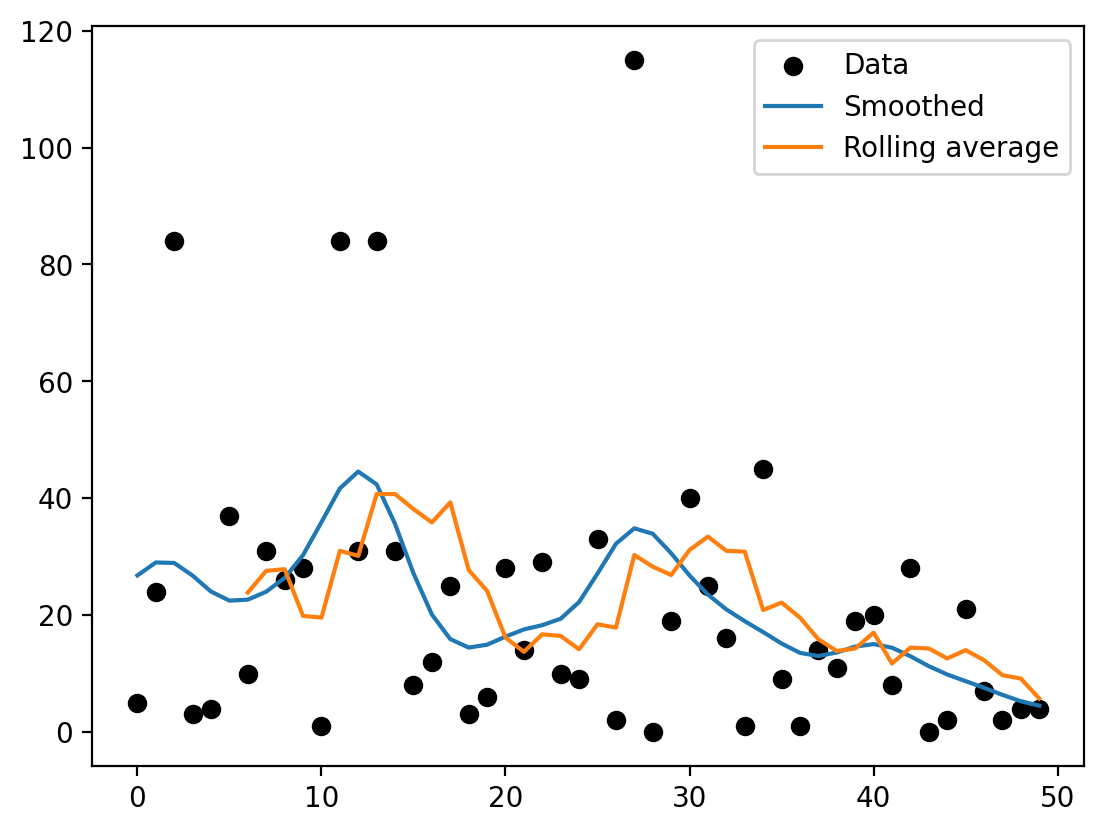

In [12]:
# Make data
n = 50
x = np.arange(n)
data = 20*np.random.randn(n)**2
data = sc.randround(data) # Stochastically round to the nearest integer -- e.g. 0.7 is rounded up 70% of the time

# Simple smoothing
smooth = sc.smooth(data, 7)

# Use a rolling average
roll = sc.rolling(data, 7)

# Plot results
import pylab as pl
sc.options(jupyter=True)
pl.scatter(x, data, c='k', label='Data')
pl.plot(x, smooth, label='Smoothed')
pl.plot(x, roll, label='Rolling average')
pl.legend();

We can also smooth 2D data: